# Clustering

In [4]:
from unsupervised_absa.clustering import ClusteringModel
from sklearn.cluster import KMeans

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def get_best_cluster(embedding, start_k, end_k, cosine_similarity=False):
    results = []
    for k in range(start_k, end_k + 1):
        km = KMeans(k, n_init=10, max_iter=1000, tol=1e-04, random_state=42)
        cluster = ClusteringModel(km)
        # convert embedding data to cosine similarity
        result = cluster.fit(embedding, cosine_distance=cosine_similarity)
        result["n_cluster"] = k
        results.append(result)
    return pd.DataFrame.from_dict(results).reset_index(drop=True)

def plot_result(df, n_cluster_variable_name, title):
    clusters = df[n_cluster_variable_name]
    fig, ax = plt.subplots(nrows=1, ncols=len(df.columns) - 1, figsize=(15, 5))
    fig.suptitle(title)
    fig.tight_layout()
    columns = list(df.columns)
    columns.remove(n_cluster_variable_name)
    for (idx, column) in enumerate(columns):
        ax[idx].plot(clusters, df[column],'bx-')
        ax[idx].set_xlabel('cluster k value') 
        ax[idx].set_ylabel(f'{column}') 
        ax[idx].set_title(f'{column} analysis')
    

### Word Embedding Clustering

Bert

2023-04-13 21:37:55.212 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 3906 Datapoints.
2023-04-13 21:37:56.855 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 3906 Datapoints.
2023-04-13 21:37:58.755 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 3906 Datapoints.
2023-04-13 21:38:00.715 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 3906 Datapoints.
2023-04-13 21:38:03.141 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 3906 Datapoints.
2023-04-13 21:38:05.654 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

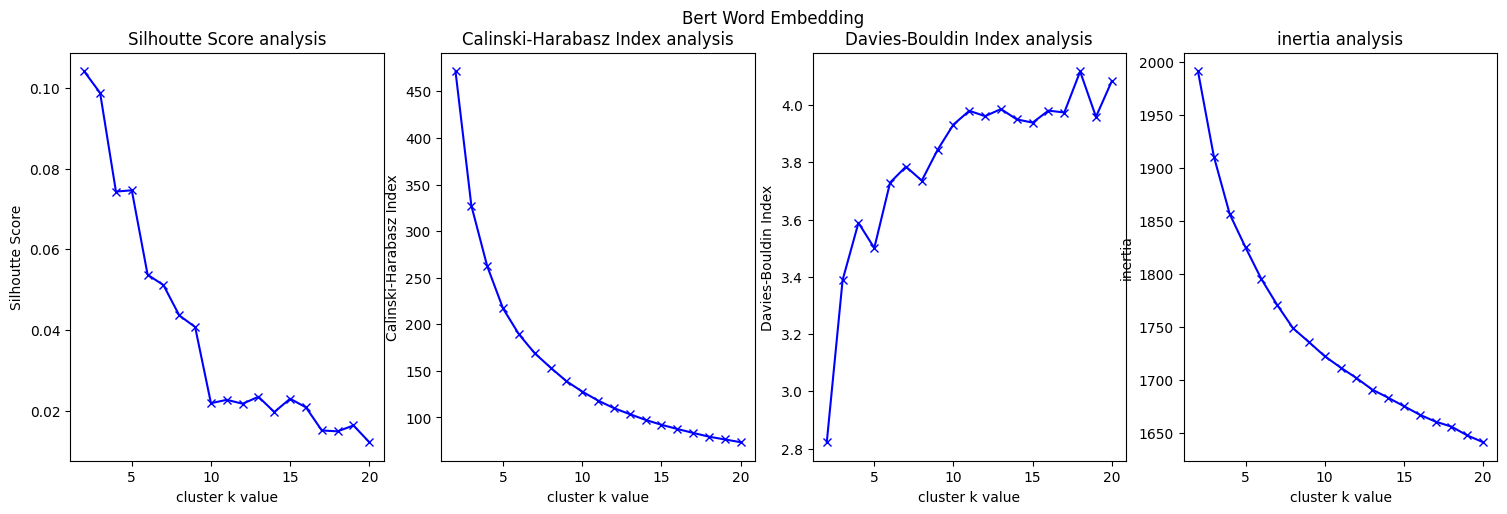

In [10]:
import numpy as np
bert_embedding = np.load('data/word embedding data/sem_eval_bert_embedding.npy', allow_pickle=True).item()
np_bert_embedding = np.stack(list(bert_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_bert_embedding, 2, 20, cosine_similarity=True)
plot_result(cluster_result, "n_cluster", "Bert Word Embedding")

Deberta

2023-04-13 21:39:15.804 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:16.197 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:16.665 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:17.258 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:18.107 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:19.281 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

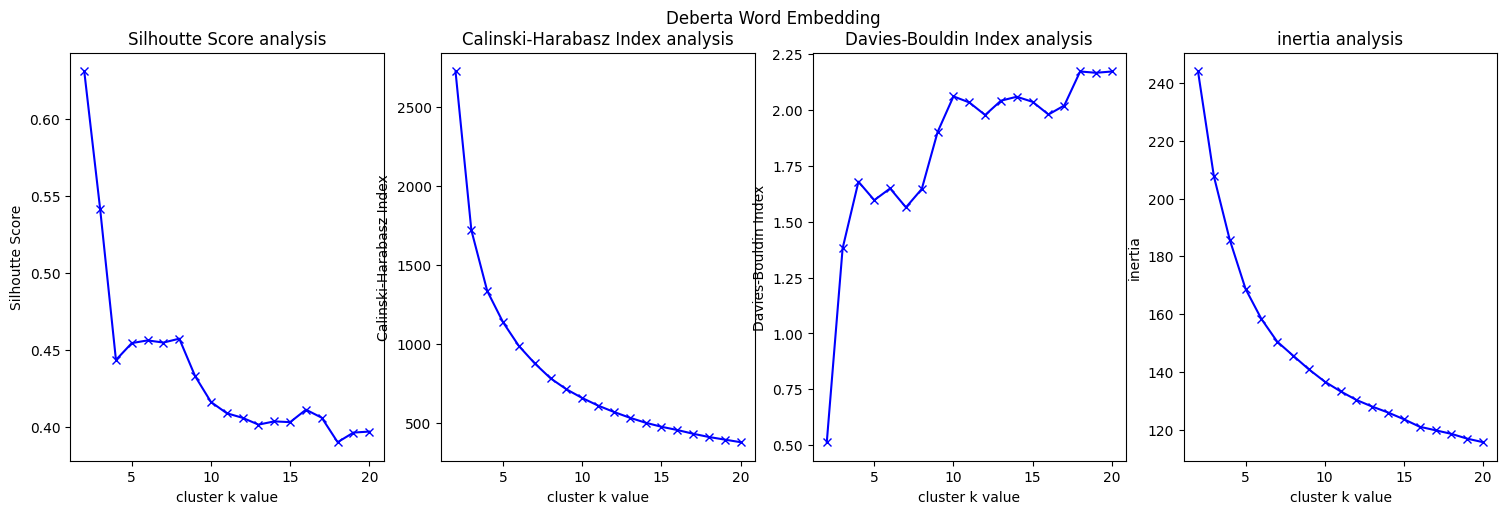

In [11]:
import numpy as np
deberta_embedding = np.load('data/word embedding data/sem_eval_deberta_embedding.npy', allow_pickle=True).item()
np_deberta_embedding = np.stack(list(deberta_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_deberta_embedding, 2, 20, cosine_similarity=True)
plot_result(cluster_result, "n_cluster", "Deberta Word Embedding")

Glove

2023-04-13 21:39:47.532 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:47.660 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:47.836 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:48.005 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:48.207 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:48.394 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

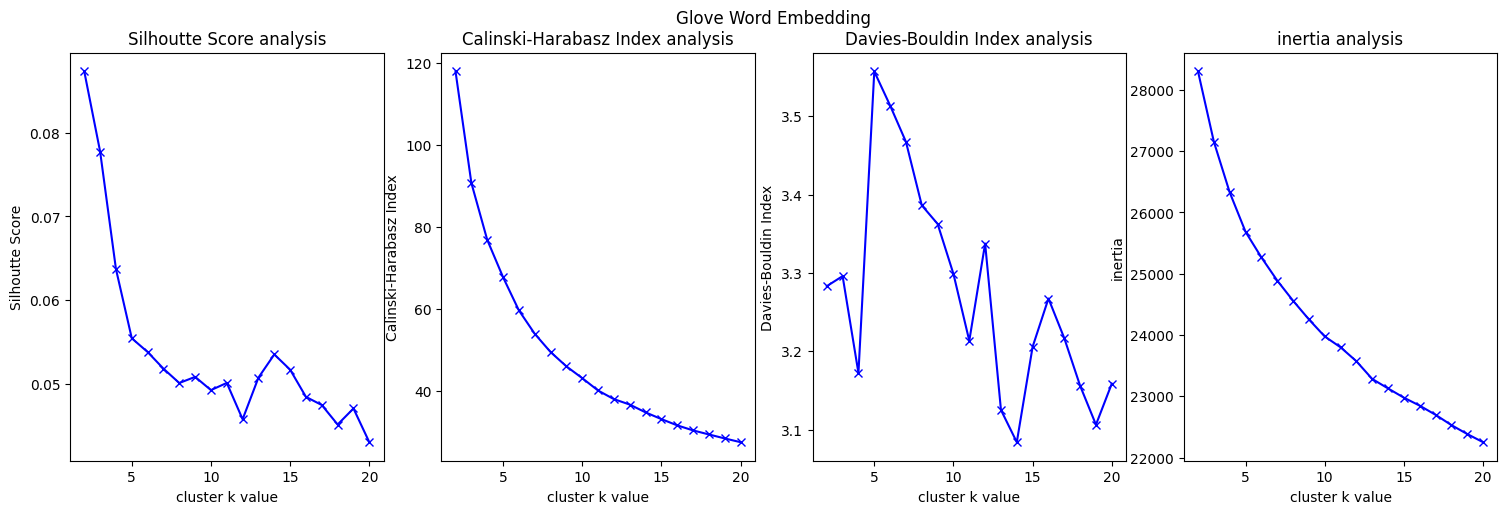

In [12]:
import numpy as np
glove_embedding = np.load('data/word embedding data/sem_eval_glove_embedding.npy', allow_pickle=True).item()
np_glove_embedding = np.stack(list(glove_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_glove_embedding, 2, 20, cosine_similarity=False)
plot_result(cluster_result, "n_cluster", "Glove Word Embedding")

FastText

2023-04-13 21:39:53.686 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:53.955 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:54.325 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:54.663 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:55.156 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:39:55.670 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

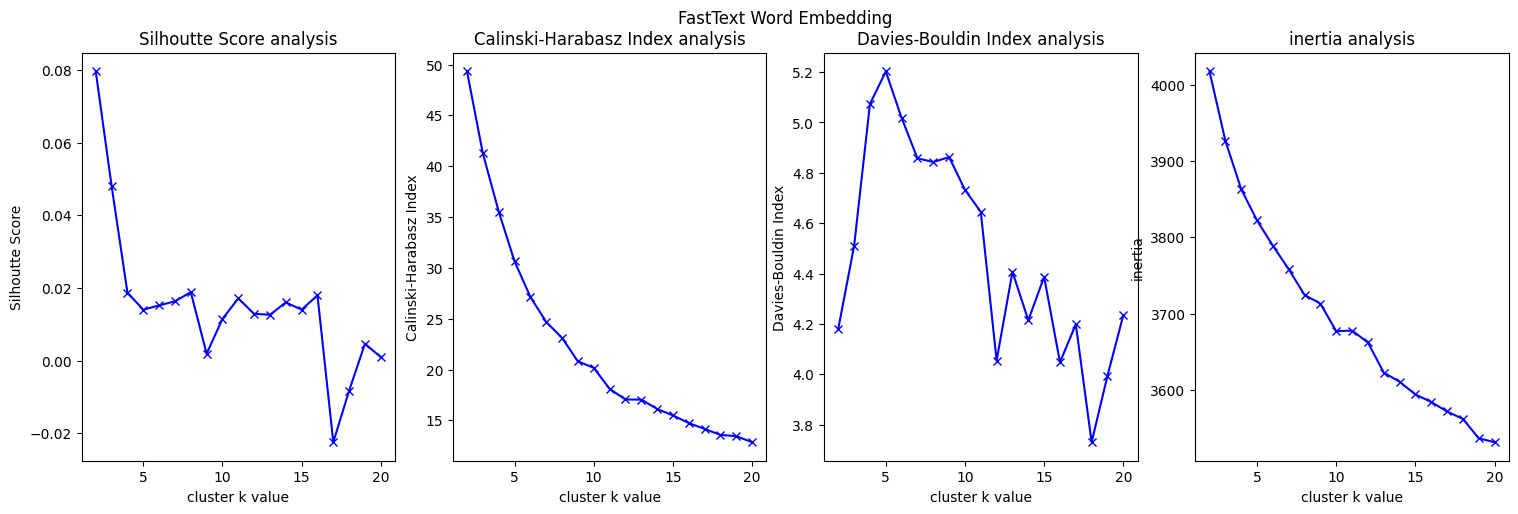

In [13]:
import numpy as np
fast_text_embedding = np.load('data/word embedding data/sem_eval_fast_text_embedding.npy', allow_pickle=True).item()
np_fast_text_embedding = np.stack(list(fast_text_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_fast_text_embedding, 2, 20, cosine_similarity=False)
plot_result(cluster_result, "n_cluster", "FastText Word Embedding")

Word2Vec

2023-04-13 21:40:06.154 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:40:06.419 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:40:06.671 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:40:07.007 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:40:07.382 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:40:07.780 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

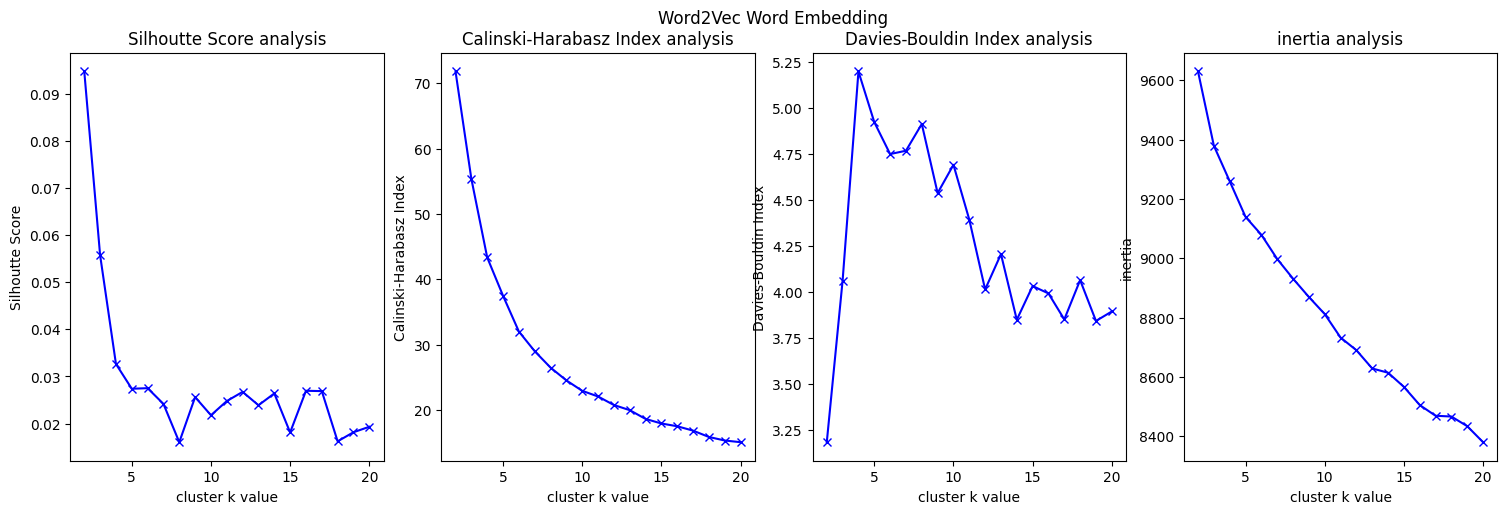

In [14]:
import numpy as np
word2vec_embedding = np.load('data/word embedding data/sem_eval_word2vec_embedding.npy', allow_pickle=True).item()
np_word2vec_embedding = np.stack(list(word2vec_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_word2vec_embedding, 2, 20, cosine_similarity=False)
plot_result(cluster_result, "n_cluster", "Word2Vec Word Embedding")

Stacked Embedding

2023-04-13 21:40:18.758 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:40:19.822 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:40:21.051 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:40:23.191 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:40:25.605 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:40:28.427 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

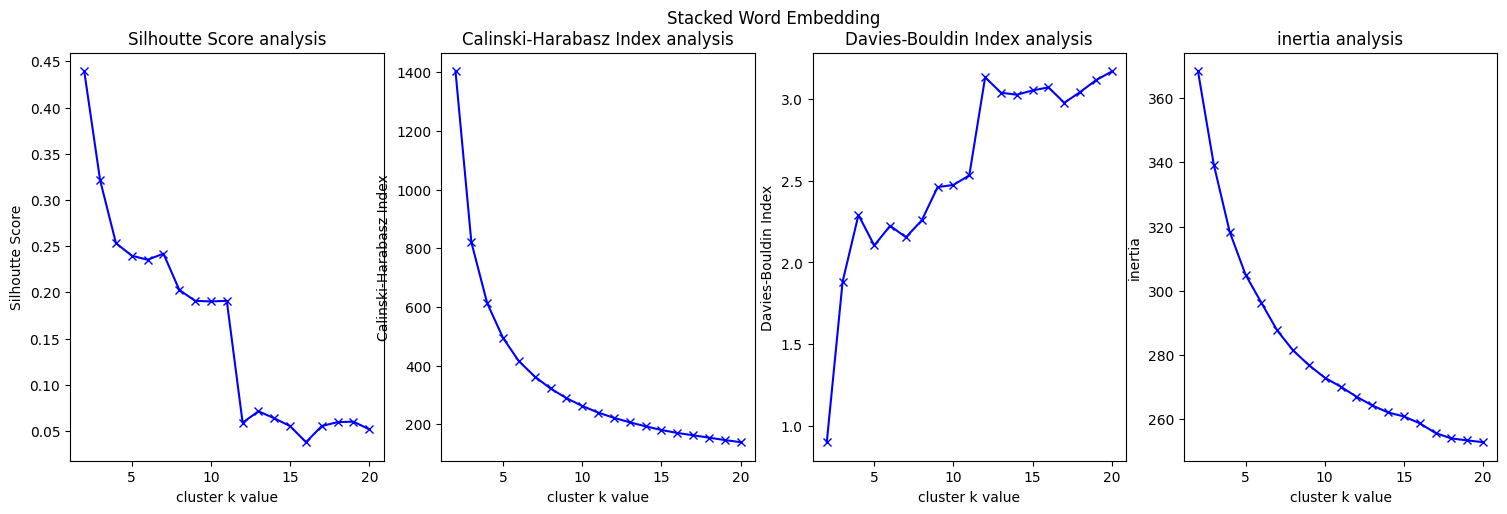

In [15]:
import numpy as np
stacked_embedding = np.load('data/word embedding data/sem_eval_stacked_embedding.npy', allow_pickle=True).item()
np_stacked_embedding = np.stack(list(stacked_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_stacked_embedding, 2, 20, cosine_similarity=True)
plot_result(cluster_result, "n_cluster", "Stacked Word Embedding")

2023-04-13 21:41:42.583 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:41:42.849 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:41:43.131 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:41:43.597 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:41:44.099 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:41:44.533 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

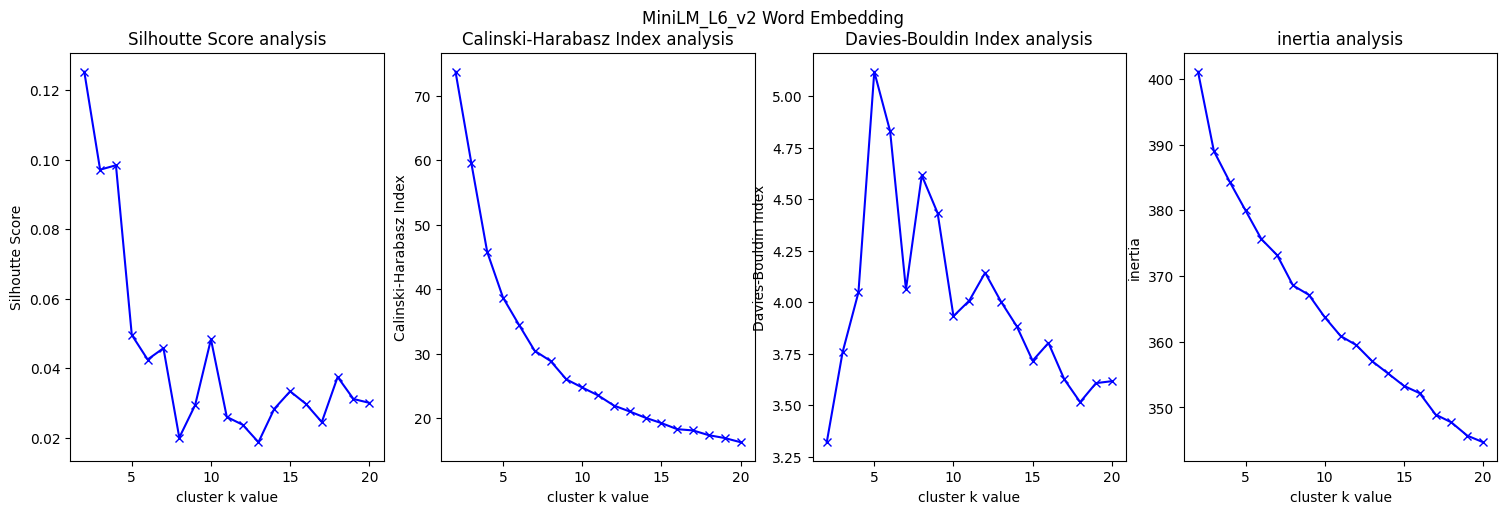

In [16]:
import numpy as np
all_MiniLM_L6_v2_word_embedding = np.load('data/word embedding data/all_MiniLM_L6_v2_word_embedding.npy', allow_pickle=True).item()
np_all_MiniLM_L6_v2_word_embedding = np.stack(list(all_MiniLM_L6_v2_word_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_all_MiniLM_L6_v2_word_embedding, 2, 20, cosine_similarity=True)
plot_result(cluster_result, "n_cluster", "MiniLM_L6_v2 Word Embedding")

2023-04-13 21:41:55.102 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:41:55.476 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:41:55.963 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:41:56.682 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:41:57.394 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:41:58.187 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

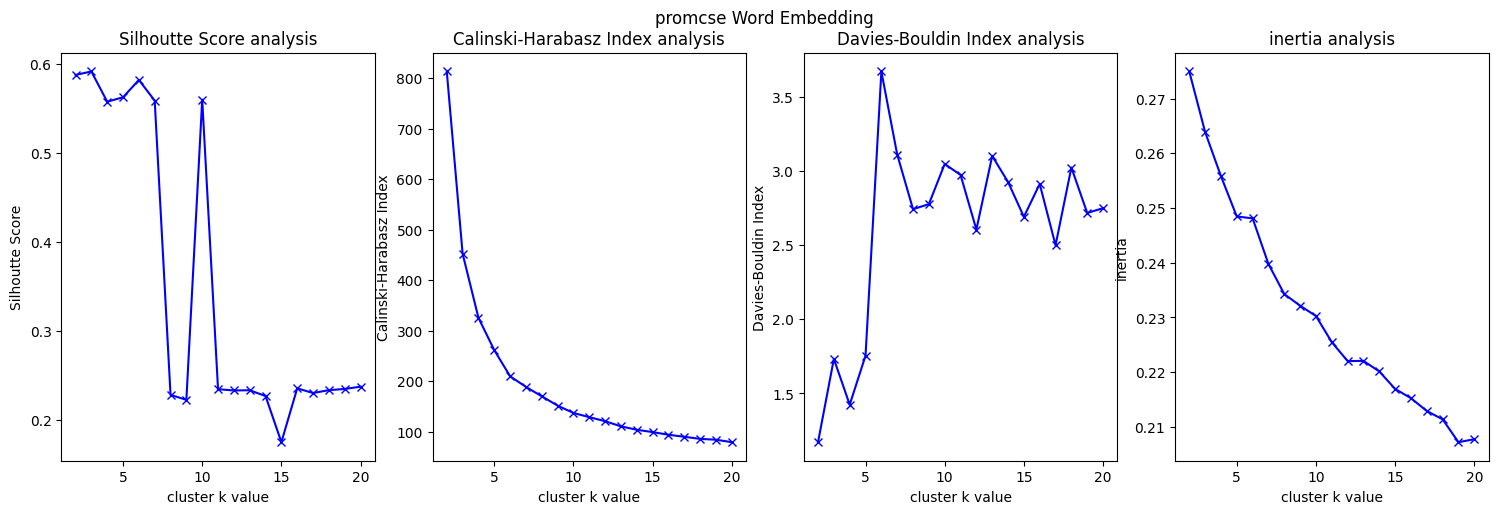

In [17]:
import numpy as np
promcse_word_embedding = np.load('data/word embedding data/promcse_word_embedding.npy', allow_pickle=True).item()
np_promcse_word_embedding = np.stack(list(promcse_word_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_promcse_word_embedding, 2, 20, cosine_similarity=True)
plot_result(cluster_result, "n_cluster", "promcse Word Embedding")

2023-04-13 21:42:23.374 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:42:23.900 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:42:24.462 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:42:25.216 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:42:25.972 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:42:26.966 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

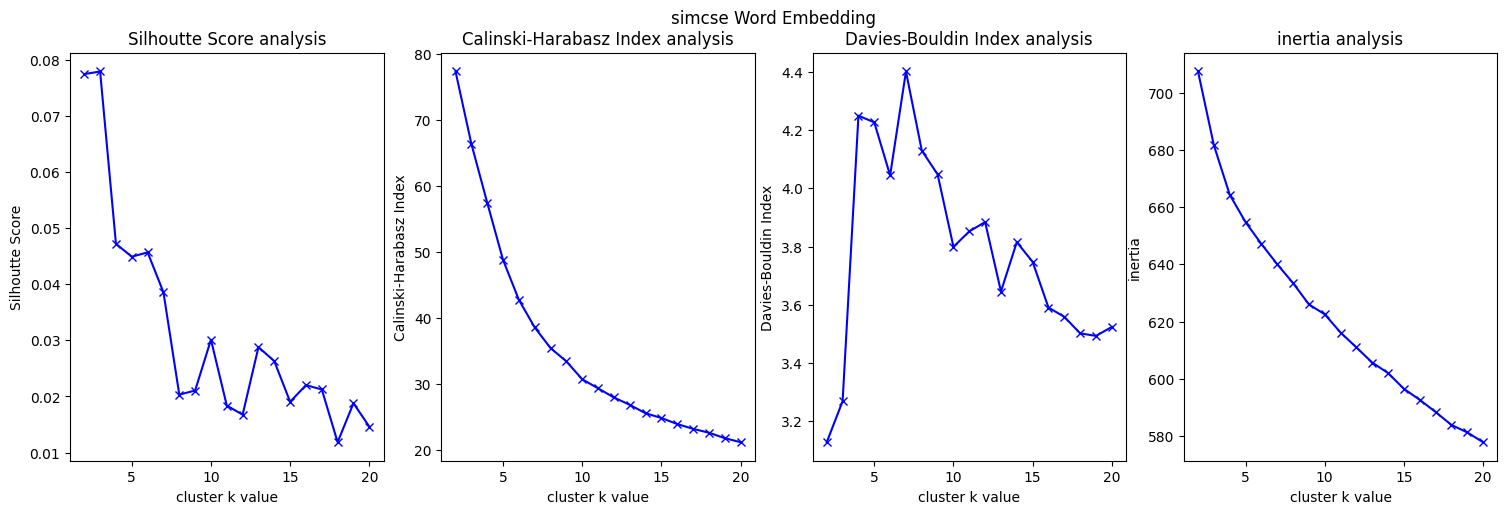

In [18]:
import numpy as np
simcse_word_embedding = np.load('data/word embedding data/simcse_word_embedding.npy', allow_pickle=True).item()
np_simcse_word_embedding = np.stack(list(simcse_word_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_simcse_word_embedding, 2, 20, cosine_similarity=True)
plot_result(cluster_result, "n_cluster", "simcse Word Embedding")

### Word Embedding Clustering for Counts of less than 1 is removed

Bert

2023-04-13 21:43:00.023 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:43:00.382 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:43:00.924 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:43:01.686 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:43:02.381 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:43:03.218 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

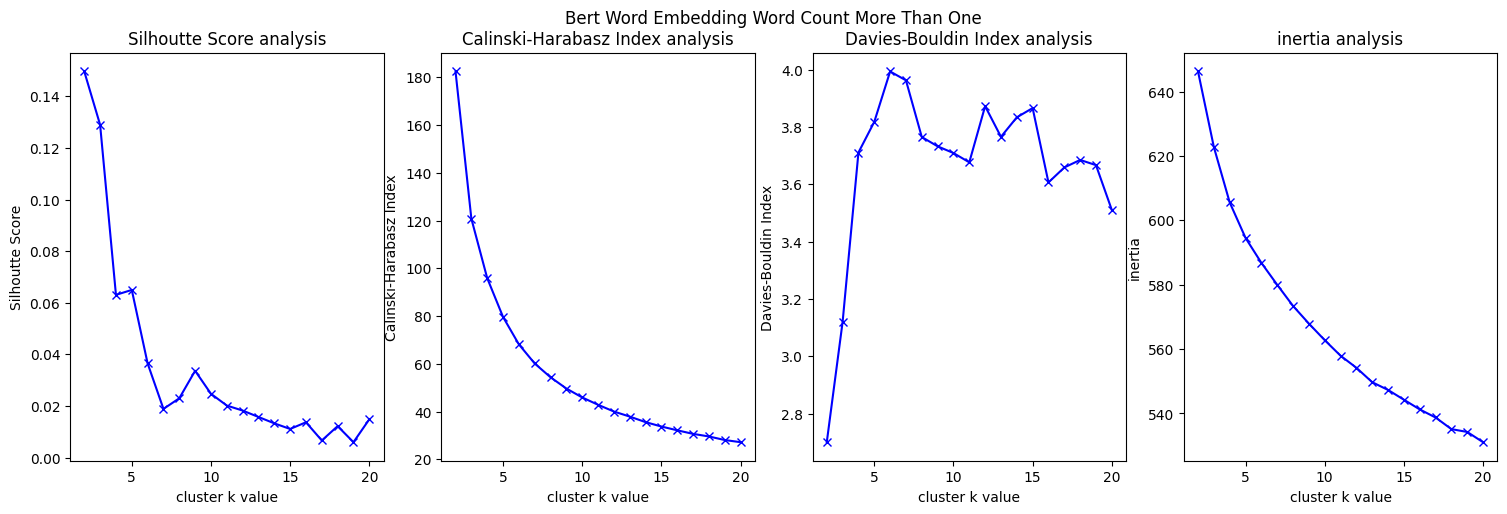

In [19]:
import numpy as np
bert_embedding = np.load('data/word embedding data/sem_eval_bert_embedding_word_count.npy', allow_pickle=True).item()
np_bert_embedding = np.stack(list(bert_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_bert_embedding, 2, 20, cosine_similarity=True)
plot_result(cluster_result, "n_cluster", "Bert Word Embedding Word Count More Than One")

Deberta

2023-04-13 21:43:27.681 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:43:28.092 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:43:28.739 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:43:29.387 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:43:30.201 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:43:31.328 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

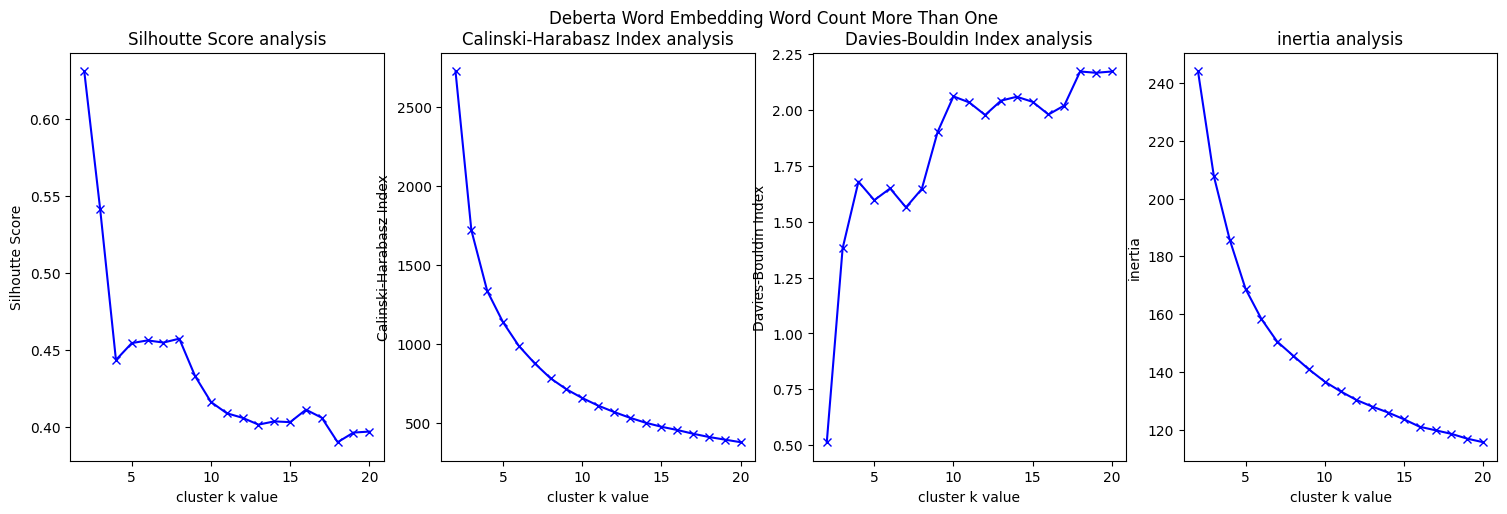

In [20]:
import numpy as np
deberta_embedding = np.load('data/word embedding data/sem_eval_deberta_embedding_word_count.npy', allow_pickle=True).item()
np_deberta_embedding = np.stack(list(deberta_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_deberta_embedding, 2, 20, cosine_similarity=True)
plot_result(cluster_result, "n_cluster", "Deberta Word Embedding Word Count More Than One")

Glove

2023-04-13 21:44:04.089 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:44:04.238 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:44:04.415 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:44:04.583 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:44:04.806 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:44:05.019 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

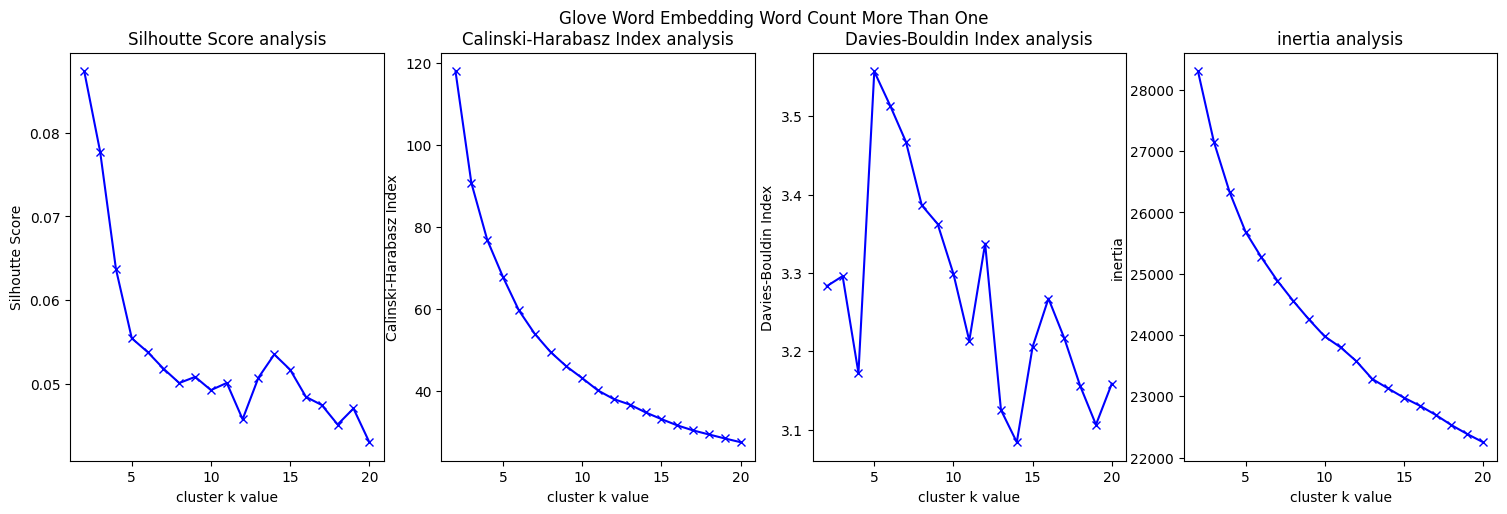

In [21]:
import numpy as np
glove_embedding = np.load('data/word embedding data/sem_eval_glove_embedding_word_count.npy', allow_pickle=True).item()
np_glove_embedding = np.stack(list(glove_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_glove_embedding, 2, 20, cosine_similarity=False)
plot_result(cluster_result, "n_cluster", "Glove Word Embedding Word Count More Than One")

FastText

2023-04-13 21:51:39.926 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:51:40.339 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:51:40.723 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:51:41.210 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:51:41.576 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:51:42.015 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

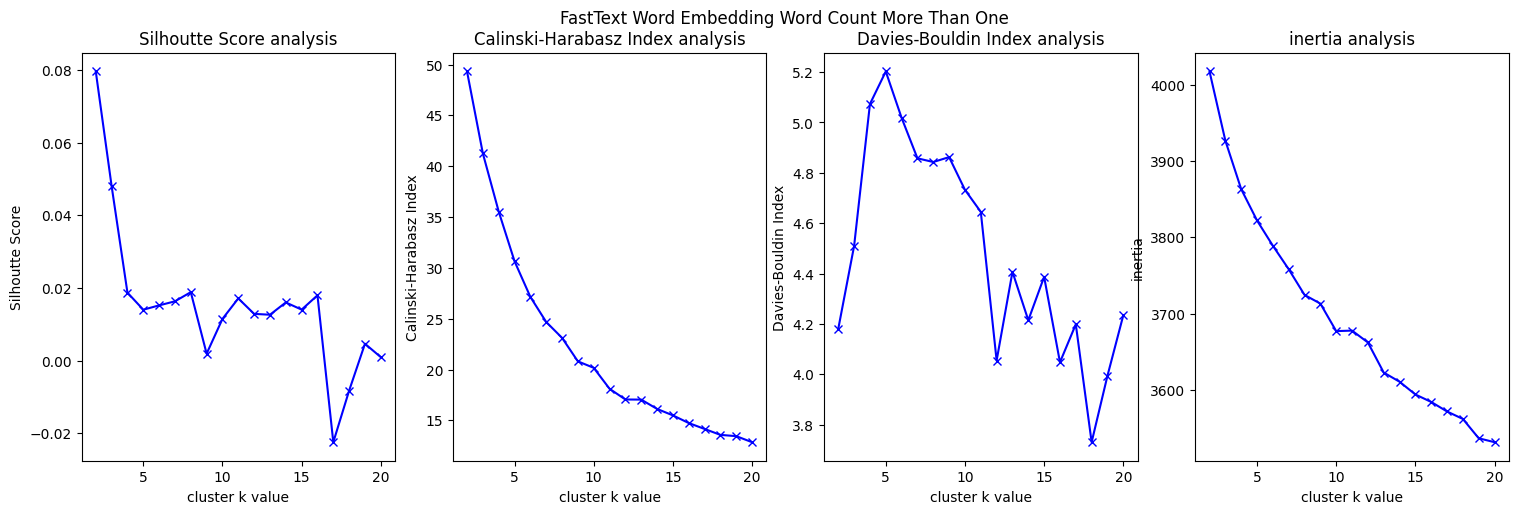

In [26]:
import numpy as np
fast_text_embedding = np.load('data/word embedding data/sem_eval_fast_text_embedding_word_count.npy', allow_pickle=True).item()
np_fast_text_embedding = np.stack(list(fast_text_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_fast_text_embedding, 2, 20, cosine_similarity=False)
plot_result(cluster_result, "n_cluster", "FastText Word Embedding Word Count More Than One")

Word2Vec

2023-04-13 21:51:53.104 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:51:53.364 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:51:53.661 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:51:53.978 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:51:54.282 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:51:54.764 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

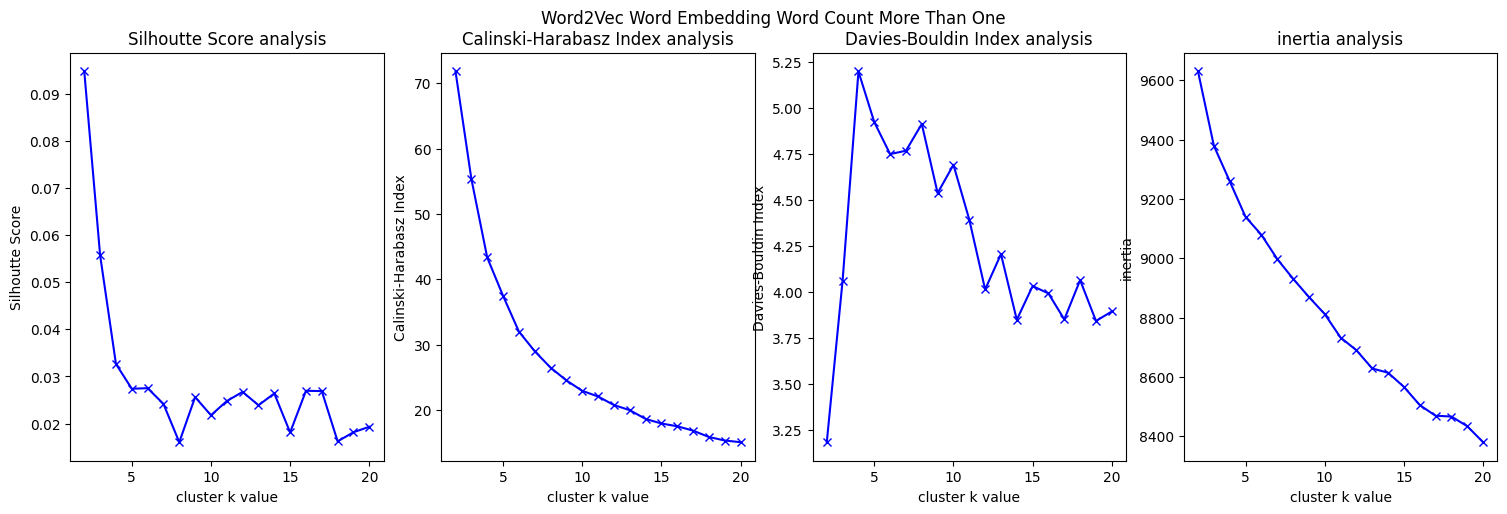

In [27]:
import numpy as np
word2vec_embedding = np.load('data/word embedding data/sem_eval_word2vec_embedding_word_count.npy', allow_pickle=True).item()
np_word2vec_embedding = np.stack(list(word2vec_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_word2vec_embedding, 2, 20, cosine_similarity=False)
plot_result(cluster_result, "n_cluster", "Word2Vec Word Embedding Word Count More Than One")

Stacked Embedding

2023-04-13 21:52:06.618 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:52:07.637 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:52:09.112 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:52:10.614 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:52:12.520 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:52:14.623 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

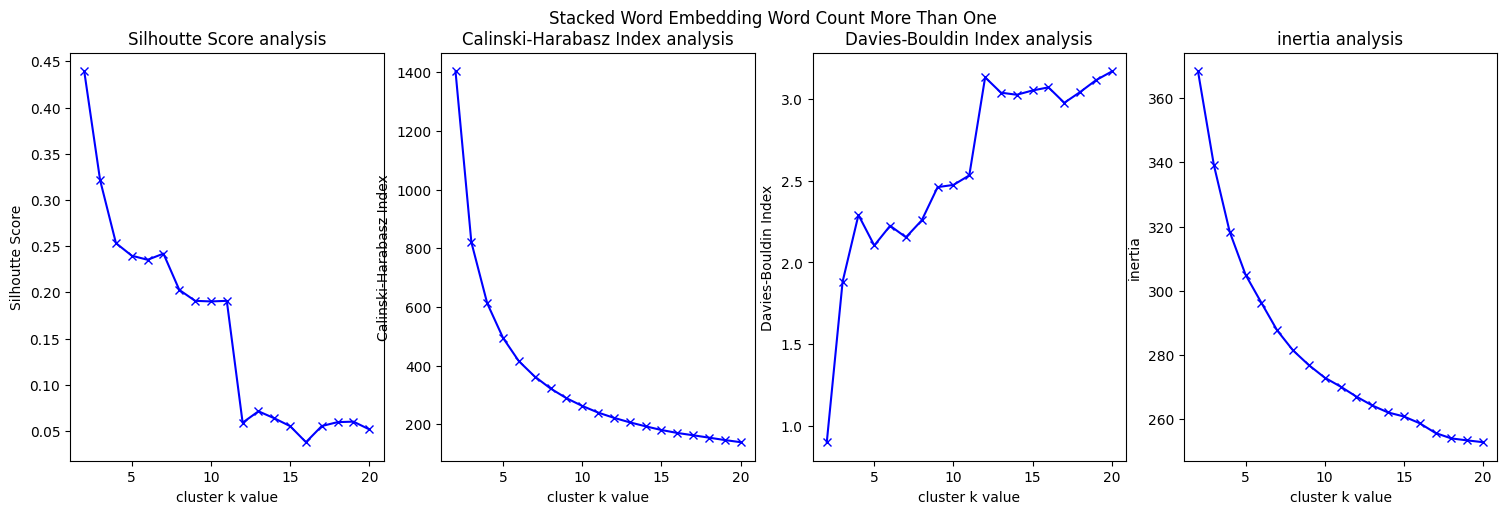

In [28]:
import numpy as np
stacked_embedding = np.load('data/word embedding data/sem_eval_stacked_embedding_word_count.npy', allow_pickle=True).item()
np_stacked_embedding = np.stack(list(stacked_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_stacked_embedding, 2, 20, cosine_similarity=True)
plot_result(cluster_result, "n_cluster", "Stacked Word Embedding Word Count More Than One")

2023-04-13 21:53:16.115 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:16.352 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:16.648 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:16.960 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:17.338 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:17.721 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

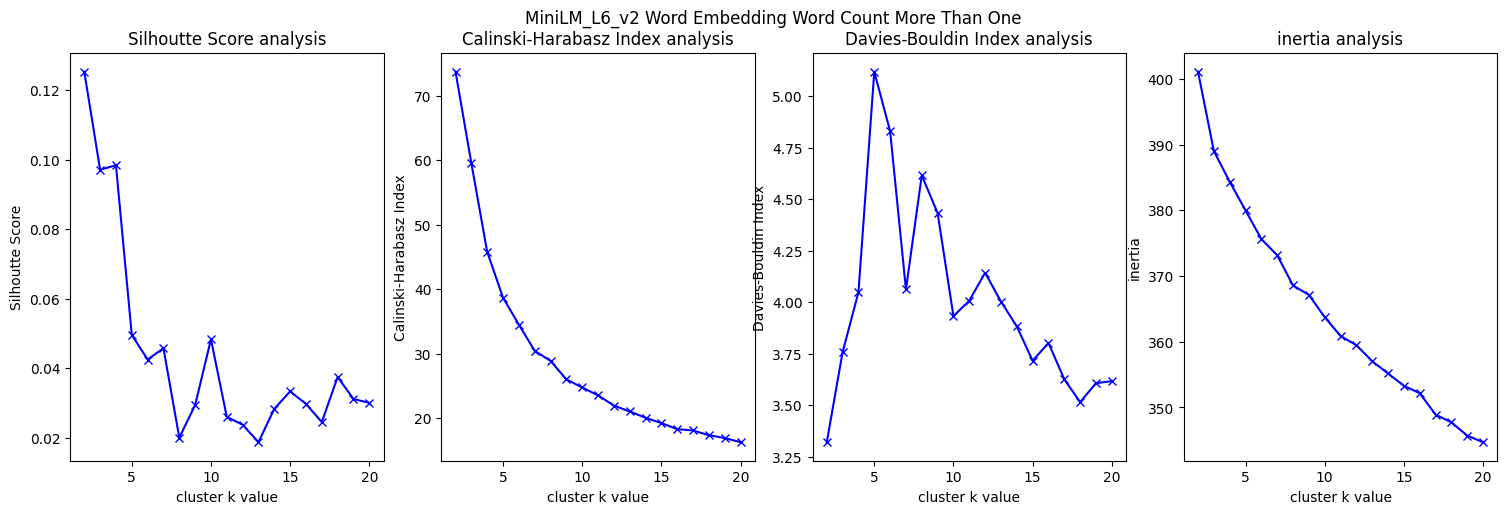

In [29]:
import numpy as np
all_MiniLM_L6_v2_word_embedding = np.load('data/word embedding data/all_MiniLM_L6_v2_word_embedding_word_count.npy', allow_pickle=True).item()
np_all_MiniLM_L6_v2_word_embedding = np.stack(list(all_MiniLM_L6_v2_word_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_all_MiniLM_L6_v2_word_embedding, 2, 20, cosine_similarity=True)
plot_result(cluster_result, "n_cluster", "MiniLM_L6_v2 Word Embedding Word Count More Than One")

2023-04-13 21:53:28.276 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:28.702 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:29.197 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:29.947 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:30.755 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:31.716 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

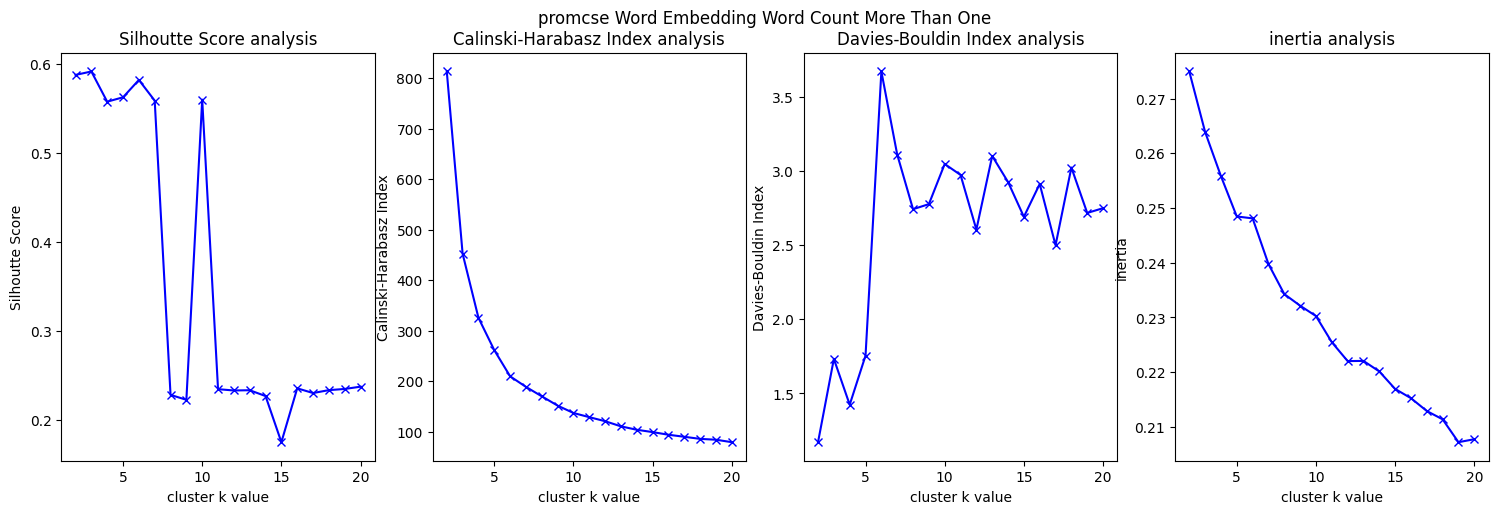

In [30]:
import numpy as np
promcse_word_embedding = np.load('data/word embedding data/promcse_word_embedding_word_count.npy', allow_pickle=True).item()
np_promcse_word_embedding = np.stack(list(promcse_word_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_promcse_word_embedding, 2, 20, cosine_similarity=True)
plot_result(cluster_result, "n_cluster", "promcse Word Embedding Word Count More Than One")

2023-04-13 21:53:56.442 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:56.998 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:57.604 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:58.362 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:53:59.208 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=42) with 1393 Datapoints.
2023-04-13 21:54:00.068 | INFO     | unsupervised_absa.clustering:fit:53 - Start clustering KMeans(max_iter=10

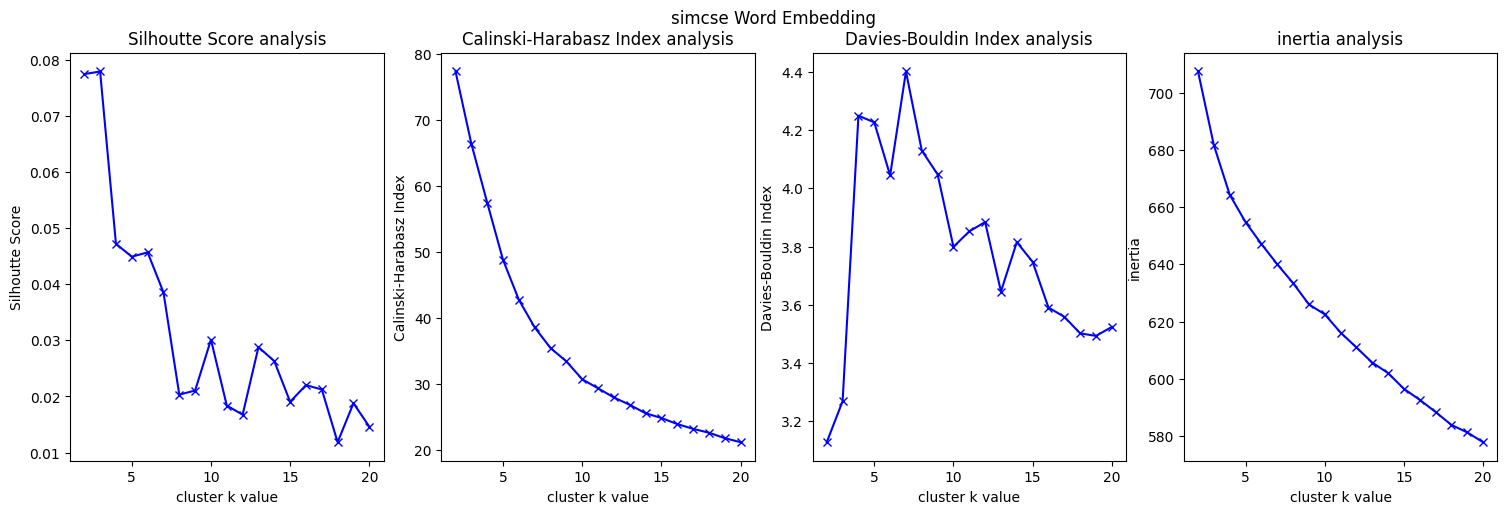

In [31]:
import numpy as np
simcse_word_embedding = np.load('data/word embedding data/simcse_word_embedding_word_count.npy', allow_pickle=True).item()
np_simcse_word_embedding = np.stack(list(simcse_word_embedding.values()), axis=0)
cluster_result = get_best_cluster(np_simcse_word_embedding, 2, 20, cosine_similarity=True)
plot_result(cluster_result, "n_cluster", "simcse Word Embedding")

### Sentence Embedding Clustering

### Perform analysis on the clusters

Looking at the samples of each clusters that are close to the clusters and that are in between (overlapping) will be great to see how the model cluster the data points. First assumption possibility is that the model understands that the dataset are mostly restaurants and laptop reviews and split it into. If so, we need to seperate the 2 dataset and perform another clustering to see further details